In [1]:
import numpy as np
import pandas as pd
import seaborn as scb
import matplotlib.pyplot as plt

Information About Data

In [2]:
df = pd.read_excel('/content/multiTimeline.xlsx')
df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Month    168 non-null    datetime64[ns]
 1   Diet     168 non-null    float64       
 2   Gym      168 non-null    float64       
 3   Finance  168 non-null    float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 5.4 KB


-- convert month column to DateTime

In [3]:
df['Month'] = pd.to_datetime(df["Month"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Month    168 non-null    datetime64[ns]
 1   Diet     168 non-null    float64       
 2   Gym      168 non-null    float64       
 3   Finance  168 non-null    float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 5.4 KB


--set month column as the index

In [4]:
df. set_index( 'Month' )  ##using inplace argument set_index

,Diet,Gym,Finance
Month,,,
2004-01-01,100.0,31.0,48.0
2004-02-01,75.0,26.0,49.0
2004-03-01,67.0,24.0,47.0
2004-04-01,70.0,22.0,48.0
2004-05-01,72.0,22.0,43.0
...,...,...,...
2017-08-01,46.0,52.0,43.0
2017-09-01,44.0,50.0,47.0
2017-10-01,44.0,47.0,45.0


In [5]:
df.head()

,Month,Diet,Gym,Finance
0,2004-01-01,100.0,31.0,48.0
1,2004-02-01,75.0,26.0,49.0
2,2004-03-01,67.0,24.0,47.0
3,2004-04-01,70.0,22.0,48.0
4,2004-05-01,72.0,22.0,43.0


In [6]:
df.tail()

,Month,Diet,Gym,Finance
163,2017-08-01,46.0,52.0,43.0
164,2017-09-01,44.0,50.0,47.0
165,2017-10-01,44.0,47.0,45.0
166,2017-11-01,41.0,47.0,47.0
167,2017-12-01,39.0,45.0,56.0


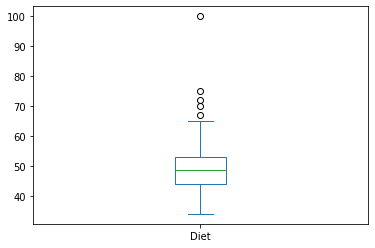

In [7]:
plt.figure();

df['Diet'].plot(kind="box");

In [12]:
df["Diet"].rolling(5).mean()

0       NaN
1       NaN
2       NaN
3       NaN
4      76.8
       ... 
163    48.6
164    47.6
165    46.8
166    45.4
167    42.8
Name: Diet, Length: 168, dtype: float64

In [13]:
df["Diet"].rolling(5).mean().dropna()

4      76.8
5      69.6
6      66.6
7      65.0
8      61.6
       ... 
163    48.6
164    47.6
165    46.8
166    45.4
167    42.8
Name: Diet, Length: 164, dtype: float64

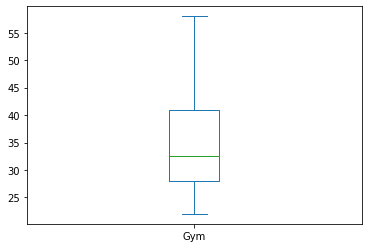

In [14]:
plt.figure();

df['Gym'].plot(kind="box");

In [15]:
df["Gym"].rolling(5).mean().dropna()

4      25.0
5      23.6
6      23.0
7      23.8
8      24.4
       ... 
163    49.8
164    50.2
165    50.0
166    49.6
167    48.2
Name: Gym, Length: 164, dtype: float64

Correlation Between the variables - Diet and Finance

In [23]:
r = np.corrcoef(df['Diet'], df['Gym'])
r

array([[ 1.        , -0.10076365],
       [-0.10076365,  1.        ]])

In [24]:
import scipy.stats
scipy.stats.pearsonr(df['Diet'], df['Gym'])

(-0.10076364593053073, 0.1937362602060802)

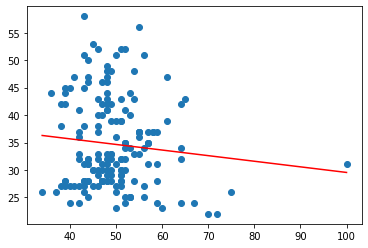

In [25]:
plt.scatter(df['Diet'], df['Gym'])
plt.plot(np.unique(df['Diet']), np.poly1d(np.polyfit(df['Diet'], df['Gym'], 1))
         (np.unique(df['Diet'])), color='red')

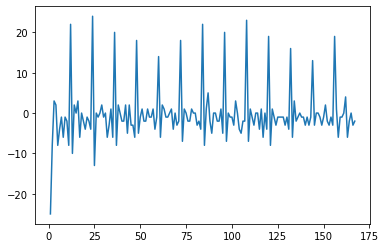

In [28]:
first_order = df['Diet'].diff(periods=1)
first_order.plot()

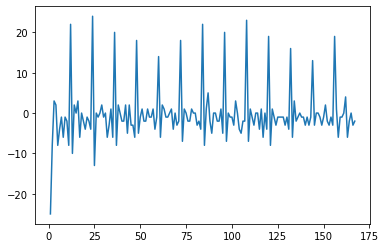

In [29]:
first_order_gym = df['Gym'].diff(periods=1)
first_order.plot()

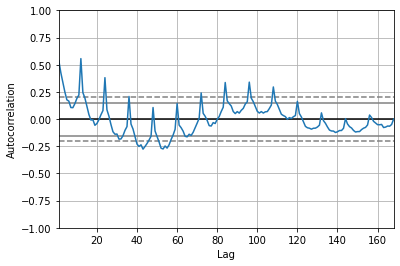

In [31]:
pd.plotting.autocorrelation_plot(df['Diet'])

The dotted line is the confidence band. Confidence band displays the probability that a parameter will fall between a pair of values around the mean. Confidence band measures the degree of uncertainty or certainty in a sampling method. They are most often constructed using confidence levels of 95% or 99%.

What is seasonality?
--> Seasonality is the reoccurance of regular and predictable changes that recur every calendar year.